In [1]:
cd ~/pycortex/
import cortex

/home/beukema2/pycortex


In [1]:
%matplotlib inline
import scipy
import pdb

from pylab import *
import scipy.cluster.hierarchy as sch
import numpy as np
#from sklearn.preprocessing import normalize
import fnmatch
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import rgb2hex, colorConverter
from scipy.spatial import distance
from scipy import signal, stats
import pdb
import matplotlib.ticker as ticker
import statsmodels.api as sm

#plotting specificis
%matplotlib inline
sns.set_context(context='paper', font_scale=2.0)
# this is the setting you want
sns.set_style("white", {'axes.linewidth':0.0000001, 'axes.edgecolor':'white'})

In [8]:
distances = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis.csv'), header=None)

distances.head()

,0,1,2,3
0,3.133200e-07,1,1,1
1,3.320500e-06,1,1,2
2,2.049700e-05,2,1,1
3,1.018300e-06,2,1,2
4,1.723500e-05,1,1,1


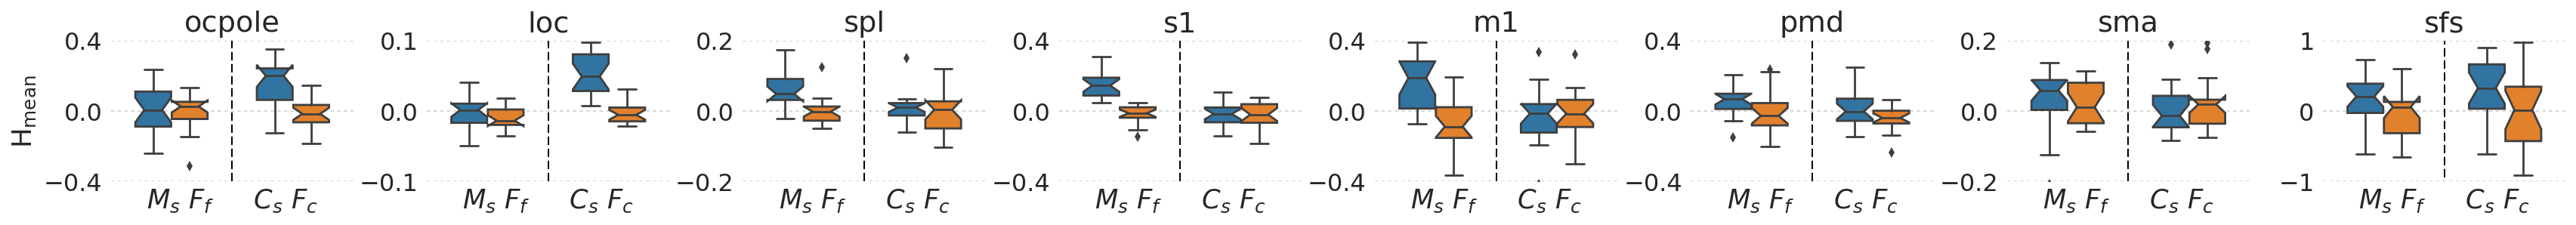

In [256]:
sns.set_context(context='paper', font_scale=2.0)
fig = plt.figure(figsize=(27,6))
distances = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis.csv'), header=None)
distances.columns = ['distance','group','roi', 'set_vs_first']
distances['normdistance'] = distances.distance*10000
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sps']
di = {1:'set', 2:'first'}
distances = distances.replace({'set_vs_first':di})
current_plot_number = 391
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.boxplot(y='normdistance', x='group',hue='set_vs_first', data=this_roi, notch=True, width=.6)
#sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.2)
g.set_xticklabels(['mvt','cue'])
plt.grid(linestyle='dotted')
plt.plot([.5, .5],[-.4, .4], 'k--', linewidth=1)
ax = plt.gca()
ax.set_xticks([])
ax.set_ylim([-.4, .4])
ax.set_ylabel(r'$\mathrm{H_{mean}}$')
ax.set_yticks([-.4, 0, .4])
ax.legend_.remove()
ax.set_xlabel('$M_s$ $F_f$     $C_s$ $F_c$')
#ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.45, 0.02))
plt.title(rois[0])
for i in arange(2,9):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.boxplot(y='normdistance', x='group',hue='set_vs_first', data=this_roi, notch=True, width=.6)
    #g = sns.violinplot(y='normdistance', x='group',hue='set_vs_first', data=this_roi)

    #sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.2)
    ax = plt.gca()
    plt.grid(linestyle='dotted')
    ax.set_xlabel('$M_s$ $F_f$     $C_s$ $F_c$')
    #ax.set_ylim([-.1, .1])
    ax.set_ylim([-.4, .4])
    ax.set_yticks([-.4,0, .4])
    ax.set_ylabel('')
    ax.set_xticks([])

    ax.legend_.remove()
    #ax.set_yticklabels([])
    
    plt.title(rois[roi_num-1])
    if rois[roi_num-1]=='sps':
        ax.set_title('sfs')
        ax.set_ylim([-1, 1])
        ax.set_yticks([-1,0, 1])
        plt.plot([.5, .5],[-2, 2], 'k--', linewidth=1)
    if rois[roi_num-1]=='sma' or rois[roi_num-1]=='spl':
        ax.set_ylim([-.2, .2])
        ax.set_yticks([-.2,0, .2])   
        plt.plot([.5, .5],[-.2, .2], 'k--', linewidth=1)
    if rois[roi_num-1]=='loc' :
        ax.set_ylim([-.1, .1])
        ax.set_yticks([-.1,0, .1])   
        plt.plot([.5, .5],[-.1, .1], 'k--', linewidth=1)
    if rois[roi_num-1]=='s1' or rois[roi_num-1]=='m1' or rois[roi_num-1]=='pmd':
        ax.set_ylim([-.4, .4])
        ax.set_yticks([-.4,0, .4])   er
        plt.plot([.5, .5],[-.4, .4], 'k--', linewidth=1)   
    #plt.plot([-.2, .8], [.025, .025], 'k-', linewidth=2)
    #plt.plot([.8, 1.2], [.25, .25], 'k--', linewidth=2)
    #plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
#     ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
#     #ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
#     ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
#     #ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
#     ax.annotate('*', xy=(.0, .025), xytext=(.45, 0.02))
plt.tight_layout(w_pad=0.2)


plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/final_figures/figure3/Hmean.svg'))   


## Repeated measures ANOVA statistical testing

In [277]:
table = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/roi_analysis_pre.csv'), header=None)
table.columns = ['distance', 'mvtvscue', 'region','setvsfirst']
for roi in xrange(1,9):
    outtable = pd.DataFrame()
    outtable['mvtset'] = table[(table['region'] == roi) & (table['mvtvscue'] == 1) & (table['setvsfirst'] == 1)].distance.values
    outtable['mvtfirst'] = table[(table['region'] == roi) & (table['mvtvscue'] == 1) & (table['setvsfirst'] == 2)].distance.values
    outtable['cueset'] = table[(table['region'] == roi) & (table['mvtvscue'] == 2) & (table['setvsfirst'] == 1)].distance.values
    outtable['cuefirst'] = table[(table['region'] == roi) & (table['mvtvscue'] == 2) & (table['setvsfirst'] == 2)].distance.values
    outtable.to_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/final_figures/figure3/stat_testing/mm_%s_pre.csv'% roi), index=False)

## Plot the RDMs for the sets and the first movement from the PRE training data

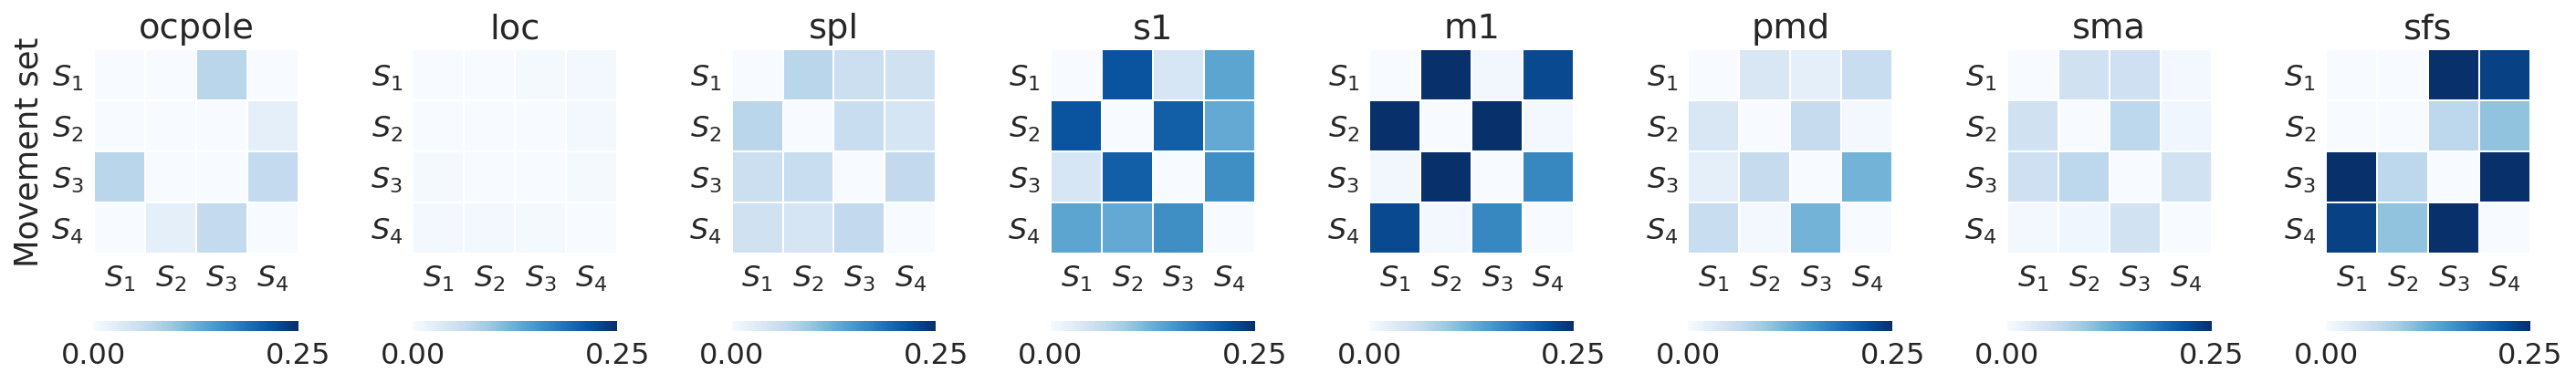

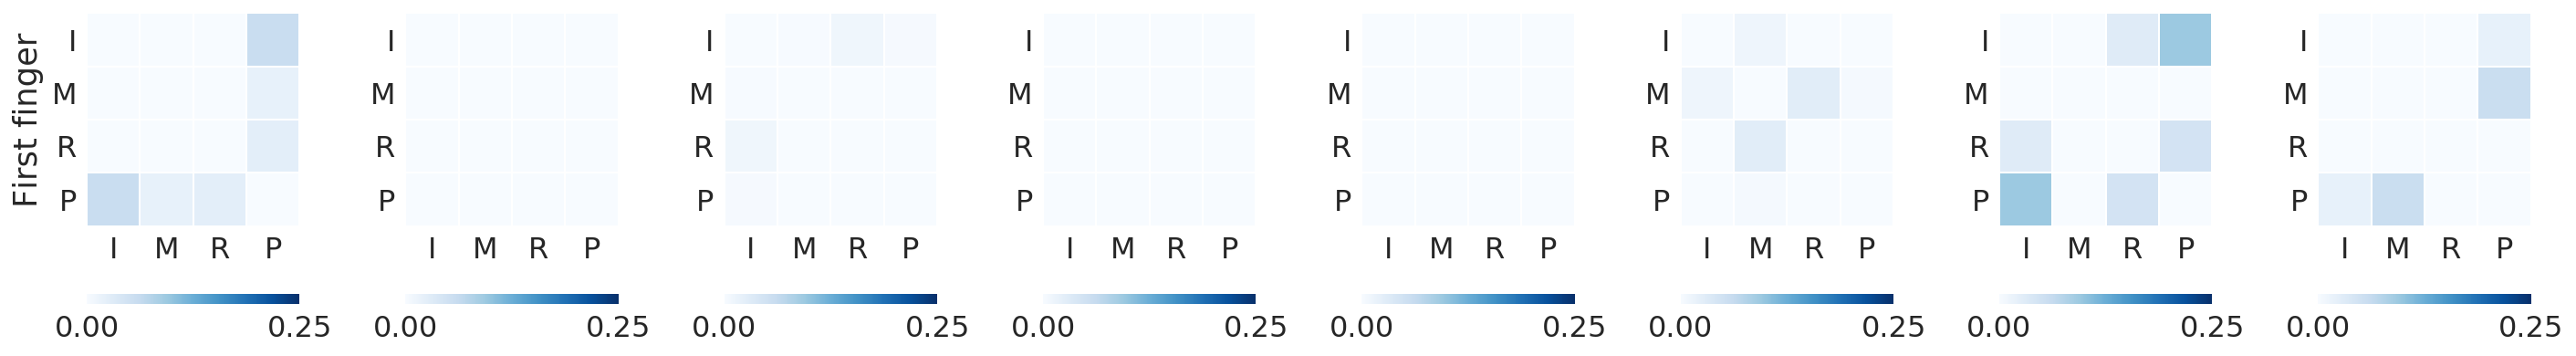

In [238]:
sns.set_context(context='paper', font_scale=2.0)

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20,4))
# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sps']
# flatten axes for easy iterating
roi_num = 0
for roi, ax in zip(rois,(axes.flatten())):
    roirdm = '/home/beukema2/Dropbox/modmap/figures/lh'+roi+'meanFingerSetRDM.csv'
    rdm = pd.read_csv(roirdm, header=None)
    rdm=rdm*10000
    rdm = rdm.as_matrix(columns=None)
    i_lower = np.tril_indices(4, -1)
    rdm[i_lower] = rdm.T[i_lower] 
    rdm = pd.DataFrame(data=rdm)
    g = sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, cmap = plt.cm.Blues,cbar=True, square=True, ax=ax,xticklabels=['$S_1$','$S_2$','$S_3$','$S_4$'], yticklabels=['$S_1$','$S_2$','$S_3$','$S_4$'],cbar_kws={'orientation': 'horizontal', 'ticks':[0, 0.25]}, vmin=0.0, vmax=0.25)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    ax.set_title(rois[roi_num])
    if roi=='sps':
        ax.set_title('sfs')
    if roi == 'ocpole':
        ax.set_ylabel('Movement set')
    roi_num += 1
fig.tight_layout()
plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/final_figures/figure3/FingerSetPreRDM.svg'))   

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20,4))
# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)
# flatten axes for easy iterating
roi_num = 0
for roi, ax in zip(rois,(axes.flatten())):
    roirdm = '/home/beukema2/Dropbox/modmap/figures/lh'+roi+'meanFirstFingerRDM.csv'
    rdm = pd.read_csv(roirdm, header=None)
    rdm=rdm*10000
    rdm = rdm.as_matrix(columns=None)
    i_lower = np.tril_indices(4, -1)
    rdm[i_lower] = rdm.T[i_lower] 
    rdm = pd.DataFrame(data=rdm)
    g = sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, 
                cmap = plt.cm.Blues,cbar=True, square=True, 
                ax=ax,xticklabels=['I','M','R','P'], yticklabels=['I','M','R','P'],
                cbar_kws={'orientation': 'horizontal', 'ticks':[0, 0.25]}, 
                vmin=-0.0, vmax=0.25)
#     ax.set_title(rois[roi_num])
#     if roi=='spl':
#         ax.set_title('sfs')
    if roi == 'ocpole':
        ax.set_ylabel('First finger')
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    roi_num += 1
fig.tight_layout()
plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/final_figures/figure3/FirstFingerPreRDM.svg'))   


## Plot the RDMs for the sets and the first cue from the PRE training data

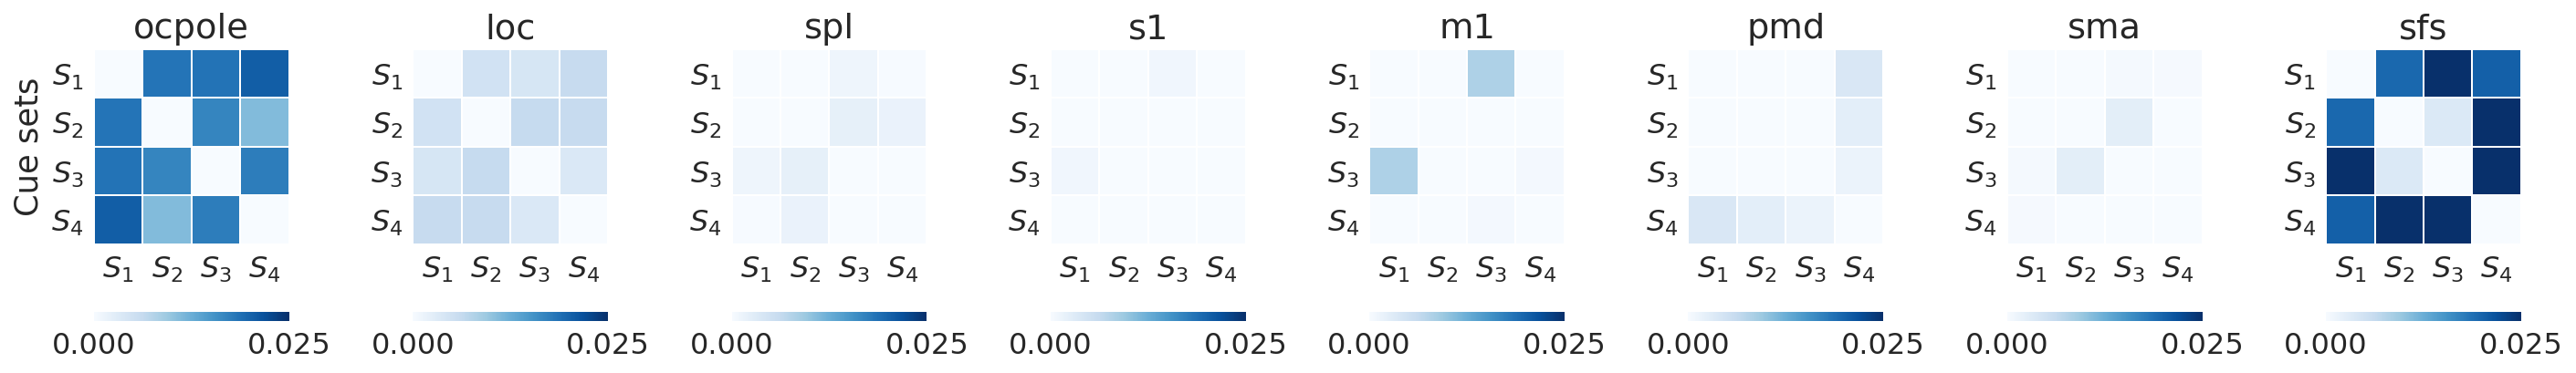

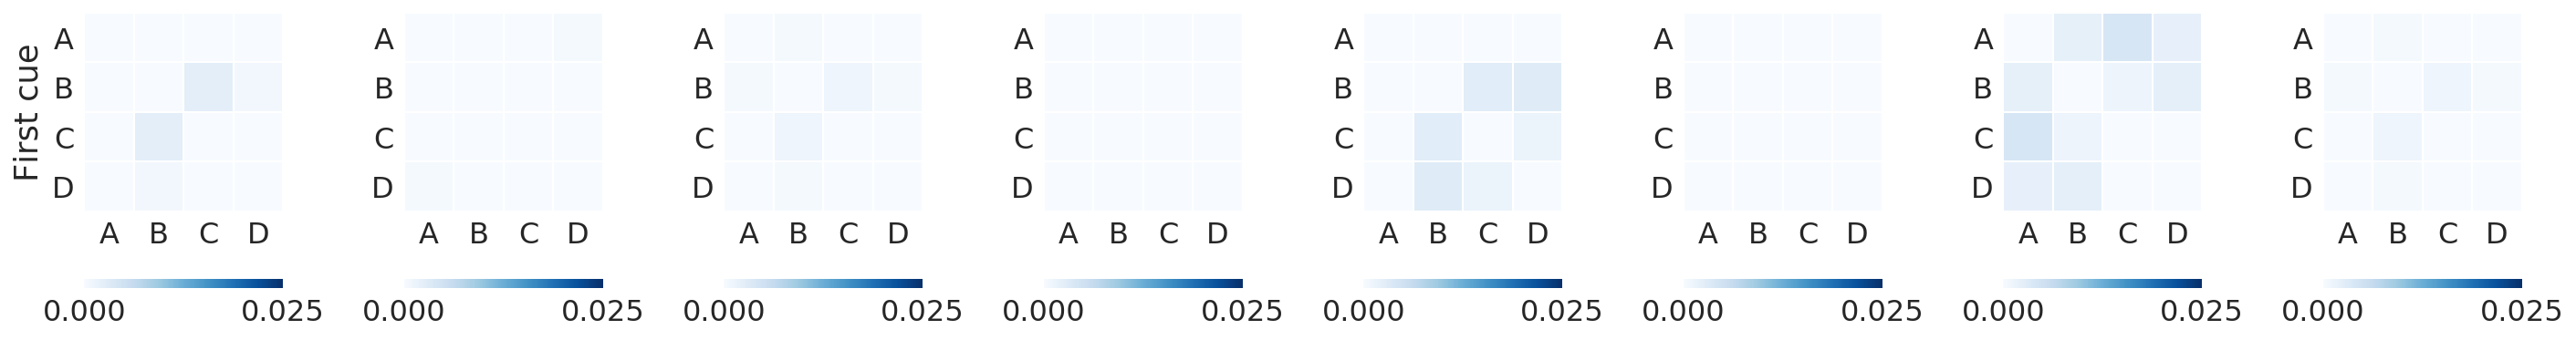

In [164]:
sns.set_context(context='paper', font_scale=2.0)
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20,4))
# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sps']
# flatten axes for easy iterating
roi_num = 0

for roi, ax in zip(rois,(axes.flatten())):
    
    roirdm = '/home/beukema2/Dropbox/modmap/figures/lh'+roi+'meanCueSetRDM.csv'
    rdm = pd.read_csv(roirdm, header=None)
    rdm=rdm*1000
    rdm = rdm.as_matrix(columns=None)
    i_lower = np.tril_indices(4, -1)
    rdm[i_lower] = rdm.T[i_lower] 
    rdm = pd.DataFrame(data=rdm)
    g = sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, 
                    cmap = plt.cm.Blues,cbar=True, square=True, 
                    ax=ax,xticklabels=['$S_1$','$S_2$','$S_3$','$S_4$'], 
                    yticklabels=['$S_1$','$S_2$','$S_3$','$S_4$'],
                    cbar_kws={'orientation': 'horizontal', 'ticks':[0, 0.025]}, 
                    vmin=-0.0, vmax=0.025)
    ax.set_title(rois[roi_num])
    if roi=='sps':
        ax.set_title('sfs')
    if roi == 'ocpole':
        ax.set_ylabel('Cue sets')
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    roi_num += 1
fig.tight_layout()
plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/final_figures/figure3/CueSetPreRDM.svg'))   

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20,4))
# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'spl']
# flatten axes for easy iterating
roi_num = 0
for roi, ax in zip(rois,(axes.flatten())):
    roirdm = '/home/beukema2/Dropbox/modmap/figures/lh'+roi+'meanFirstCueRDM.csv'
    rdm = pd.read_csv(roirdm, header=None)
    rdm=rdm*1000
    rdm = rdm.as_matrix(columns=None)
    i_lower = np.tril_indices(4, -1)
    rdm[i_lower] = rdm.T[i_lower] 
    rdm = pd.DataFrame(data=rdm)
    g = sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, 
                cmap = plt.cm.Blues,cbar=True, square=True, 
                ax=ax,xticklabels=['A','B','C','D'], 
                yticklabels=['A','B','C','D'],
                cbar_kws={'orientation': 'horizontal', 'ticks':[0, 0.025]}, 
                vmin=-0.0, vmax=0.025)
    #ax.set_title(rois[roi_num])
    #if roi=='spl':
    #    ax.set_title('sfs')
    if roi == 'ocpole':
        ax.set_ylabel('First cue')
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    roi_num += 1
fig.tight_layout()
plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/final_figures/figure3/FirstCuePreRDM.svg'))   


In [111]:


response = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_response_cluster_vol.nii', 'modmap', 'identity', priority=1, vmin=0, vmax=3)
cue = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_cue_cluster_vol.nii', 'modmap', 'identity',priority=2, vmin=0, vmax=3)
finger_vs_set = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_finger_vs_set_cluster_vol.nii', 'modmap', 'identity', priority=3, vmin=0, vmax=3)
cue_vs_set = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_cue_vs_set_cluster_vol.nii', 'modmap', 'identity',priority=4, vmin=0, vmax=3)
finger_minus_first_effect = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_response_excluding_first_effect_cluster_vol.nii', 'modmap', 'identity', priority=5, vmin=0, vmax=3)
cue_minus_first_effect = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_cue_excluding_first_effect_cluster_vol.nii', 'modmap', 'identity',priority=6, vmin=0, vmax=3)

volumes = {
    'response': response,
    'cue': cue,
    'finger_vs_set': finger_vs_set,
    'cue_vs_set': cue_vs_set,
    'finger_minus_first_effect': finger_minus_first_effect,
    'cue_minus_first_effect': cue_minus_first_effect
    }

_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/figures/response.png', response, recache=False, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,0.1],  with_colorbar=False)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/figures/cue.png', cue, recache=False, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3], with_colorbar=False)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/figures/finger_vs_set.png', finger_vs_set, recache=False, with_curvature=True, cmap = 'Blues', with_colorbar=False)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/figures/cue_vs_set.png', cue_vs_set, recache=False, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3], with_colorbar=False)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/figures/finger_minus_first_effect.png', finger_minus_first_effect, recache=False, with_curvature=True,  colorbar_ticks=[0,3], colorbar_ticklabelsize=30,vmin=0, vmax=3)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/figures/cue_minus_first_effect.png', cue_minus_first_effect, recache=False, with_curvature=True, colorbar_ticks=[0,3], colorbar_ticklabelsize=30,vmin=0, vmax=3)

   

In [20]:
# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sfs']
# flatten axes for easy iterating
current_plot_number = 351
ax = fig.add_subplot(current_plot_number)
roirdm = '/home/beukema2/Dropbox/modmap/figures/lh'+roi+'meanFirstFingerRDM.csv'
rdm = pd.read_csv(roirdm, header=None)
rdm=rdm*1000
sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, cmap = plt.cm.Blues,cbar=True, square=True, ax=ax,xticklabels=['R1','R2','R3','R4'], yticklabels=['R1','R2','R3','R4'],cbar_kws={'orientation': 'horizontal', 'ticks':[rdm.values.min(), rdm.values.max()]})
ax = fig.add_subplot(current_plot_number+1)
roirdm = '/home/beukema2/Dropbox/modmap/figures/lh'+roi+'meanFirstFingerRDM.csv'
rdm = pd.read_csv(roirdm, header=None)
rdm=rdm*1000
sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, cmap = plt.cm.Blues,cbar=True, square=True, ax=ax,xticklabels=['R1','R2','R3','R4'], yticklabels=['R1','R2','R3','R4'],cbar_kws={'orientation': 'horizontal', 'ticks':[rdm.values.min(), rdm.values.max()]})
ax = fig.add_subplot(current_plot_number+2)
roirdm = '/home/beukema2/Dropbox/modmap/figures/lh'+roi+'meanFirstFingerRDM.csv'
rdm = pd.read_csv(roirdm, header=None)
rdm=rdm*1000
sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, cmap = plt.cm.Blues,cbar=True, square=True, ax=ax,xticklabels=['R1','R2','R3','R4'], yticklabels=['R1','R2','R3','R4'],cbar_kws={'orientation': 'horizontal', 'ticks':[rdm.values.min(), rdm.values.max()]})
ax = fig.add_subplot(current_plot_number+3)
roirdm = '/home/beukema2/Dropbox/modmap/figures/lh'+roi+'meanFirstFingerRDM.csv'
rdm = pd.read_csv(roirdm, header=None)
rdm=rdm*1000
sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, cmap = plt.cm.Blues,cbar=True, square=True, ax=ax,xticklabels=['R1','R2','R3','R4'], yticklabels=['R1','R2','R3','R4'],cbar_kws={'orientation': 'horizontal', 'ticks':[rdm.values.min(), rdm.values.max()]})
ax = fig.add_subplot(current_plot_number+4)
#ax.set_title(rois[roi_num])

#Now plot the average distances
plt.grid(linestyle='dotted')
this_roi = distances[distances['roi']==1]
g = sns.barplot(y='normdistance', x='group',hue='set_vs_first', data=this_roi, ci=68, ax=ax)
#sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)

plt.grid(linestyle='dotted')
ax.set_xlabel('')
ax.set_ylim([-.05, .05])
g.set_xticklabels(['mvt','cue'])
ax.legend_.remove()
ax.set_yticklabels([])
ax.set_ylabel('')
plt.plot([.5, .5],[-.025, .025], 'k--', linewidth=2)
#plt.title(rois[roi_num-1])
#plt.plot([-.2, .8], [.025, .025], 'k-', linewidth=2)
plt.plot([.8, 1.2], [.25, .25], 'k--', linewidth=2)
plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
ax.annotate('*', xy=(.0, .025), xytext=(.4, 0.015))
#fig.tight_layout()
plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/test.svg'))   

## Plasticity Analysis

In [192]:
distances = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_post.csv'), header=None)
distances.columns = ['distance','mvtvscue','roi', 'pre_vs_post','group']
distances = distances.loc[distances['group'] == 0]
del distances['group']            

In [193]:
distances.head()


,distance,mvtvscue,roi,pre_vs_post
0,3.1332e-07,1,1,1
1,2.0236e-05,1,1,2
2,2.0497e-05,2,1,1
3,2.9624e-05,2,1,2
12,-8.7176e-06,1,1,1


In [6]:
distances = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_post.csv'), header=None)
distances.head()

,0,1,2,3
0,-5.519600e-06,1,1,0
1,-3.412400e-06,2,1,0
2,7.747500e-07,3,1,0
3,-5.880700e-06,4,1,0
4,4.962000e-06,1,1,1


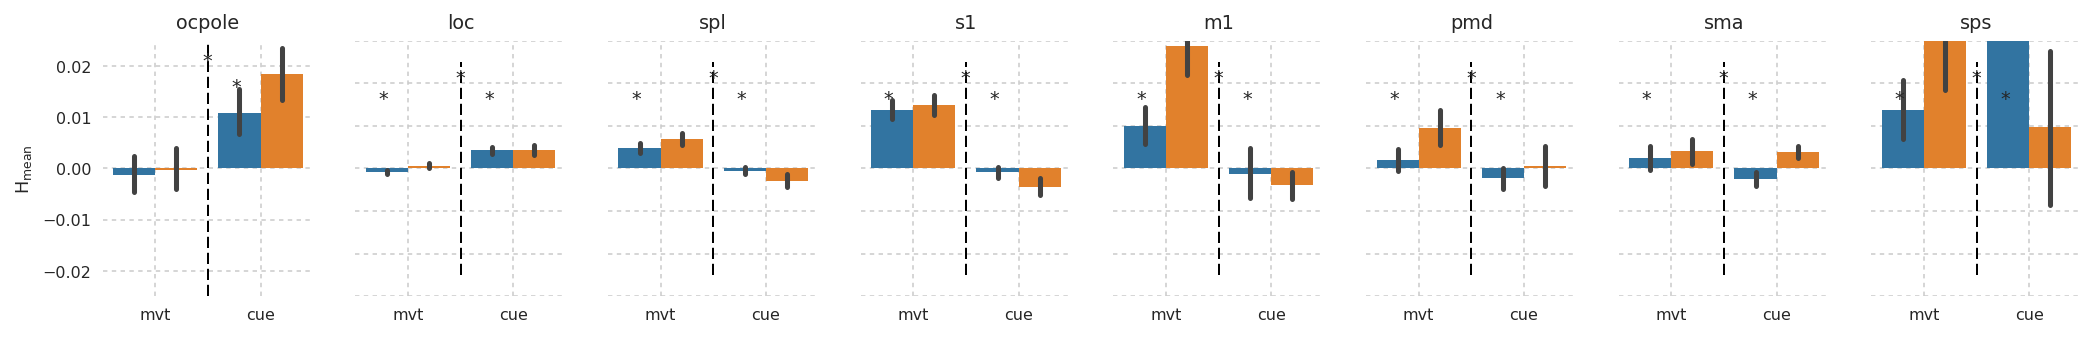

In [203]:
fig = plt.figure(figsize=(20,8))
distances = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_post.csv'), header=None)
distances.columns = ['distance','mvtvscue','roi', 'pre_vs_post','group']
distances = distances.loc[distances['group'] == 0]
del distances['group']
distances['normdistance'] = distances.distance*1000
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sfs']
di = {1:'pre', 2:'post'}
distances = distances.replace({'pre_vs_post':di})
current_plot_number = 391
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.barplot(y='normdistance', x='mvtvscue',hue='pre_vs_post', data=this_roi,ci=68)
#sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)
g.set_xticklabels(['mvt','cue'])
plt.grid(linestyle='dotted')
plt.plot([.5, .5],[-.025, .025], 'k--', linewidth=1)
ax = plt.gca()
ax.set_ylim([-.025, .025])
ax.set_ylabel(r'$\mathrm{H_{mean}}$')
ax.legend_.remove()
ax.set_xlabel('')
#ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
ax.annotate('*', xy=(.0, .025), xytext=(.45, 0.02))
plt.title(rois[0])
for i in arange(2,9):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='normdistance', x='mvtvscue',hue='pre_vs_post', data=this_roi, ci=68)
    #sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)
    ax = plt.gca()
    plt.grid(linestyle='dotted')
    ax.set_xlabel('')
    ax.set_ylim([-.03, .03])
    ax.set_ylabel('')
    g.set_xticklabels(['mvt','cue'])
    ax.legend_.remove()
    ax.set_yticklabels([])

    plt.plot([.5, .5],[-.025, .025], 'k--', linewidth=1)
    plt.title(rois[roi_num-1])
    #plt.plot([-.2, .8], [.025, .025], 'k-', linewidth=2)
    #plt.plot([.8, 1.2], [.25, .25], 'k--', linewidth=2)
    #plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
    ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
    ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
    ax.annotate('*', xy=(.0, .025), xytext=(.45, 0.02))
plt.tight_layout
plt.savefig(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_pre.svg'), format='svg', dpi=1000)

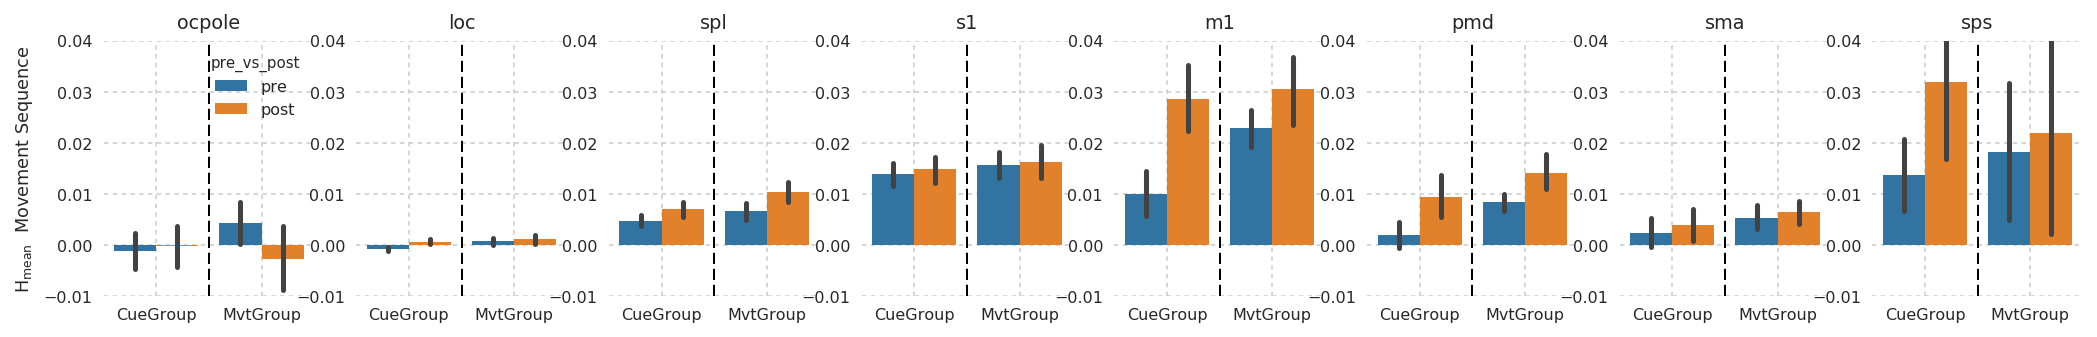

In [234]:
fig = plt.figure(figsize=(20,8))
distances = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_post.csv'), header=None)
distances.columns = ['distance','mvtvscue','roi', 'pre_vs_post','group']
distances = distances.loc[distances['mvtvscue'] == 1]
del distances['mvtvscue']
distances['normdistance'] = distances.distance*1000
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sfs']
di = {1:'pre', 2:'post'}
distances = distances.replace({'pre_vs_post':di})
current_plot_number = 391
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.barplot(y='normdistance', x='group',hue='pre_vs_post', data=this_roi,ci=68)
#sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)
g.set_xticklabels(['CueGroup','MvtGroup'])
plt.grid(linestyle='dotted')
plt.plot([.5, .5],[-.01, .04], 'k--', linewidth=1)
ax = plt.gca()
ax.set_ylim([-.01, .04])
ax.set_ylabel(r'$\mathrm{H_{mean}}$  Movement Sequence')
#ax.legend_.remove()
ax.set_xlabel('')
#ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.45, 0.02))
plt.title(rois[0])
for i in arange(2,9):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='normdistance', x='group',hue='pre_vs_post', data=this_roi, ci=68)
    #sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)
    ax = plt.gca()
    plt.grid(linestyle='dotted')
    ax.set_xlabel('')
    ax.set_ylim([-.01, .04])
    ax.set_ylabel('')
    g.set_xticklabels(['CueGroup','MvtGroup'])
    ax.legend_.remove()
    #ax.set_yticklabels([])
    
    plt.plot([.5, .5],[-.01, .04], 'k--', linewidth=1)
    plt.title(rois[roi_num-1])
    #plt.plot([-.2, .8], [.025, .025], 'k-', linewidth=2)
    #plt.plot([.8, 1.2], [.25, .25], 'k--', linewidth=2)
    #plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
    #ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(.45, 0.02))
#plt.tight_layout
plt.savefig(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_post_mvt_seqs.svg'), format='svg', dpi=1000)

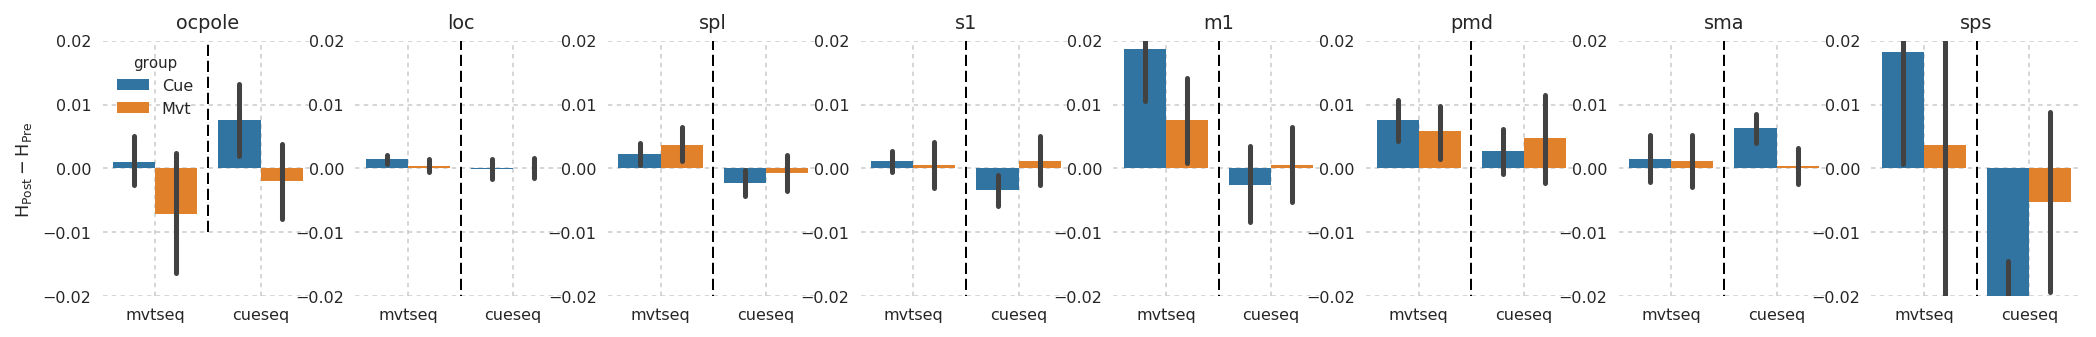

In [271]:
fig = plt.figure(figsize=(20,8))
distances = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_post.csv'), header=None)
distances.columns = ['distance','mvtvscue','roi','group']
distances = distances.loc[distances['mvtvscue'].isin([1,2])]
distances['normdistance'] = distances.distance*1000
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sfs']
di = {1:'pre', 2:'post'}
dgroup = {0:'Cue', 1:'Mvt'}
distances = distances.replace({'pre_vs_post':di})
distances = distances.replace({'group':dgroup})
current_plot_number = 391
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.barplot(y='normdistance', x='mvtvscue',hue='group', data=this_roi,ci=68)
#sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)
g.set_xticklabels(['mvtseq','cueseq'])
plt.grid(linestyle='dotted')
plt.plot([.5, .5],[-.01, .04], 'k--', linewidth=1)
ax = plt.gca()
ax.set_ylim([-.02, .02])
ax.set_ylabel(r'$\mathrm{H_{Post}} - \mathrm{H_{Pre}}$ ')
#ax.legend_.remove()
ax.set_xlabel('')
#ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
#ax.annotate('*', xy=(.0, .025), xytext=(.45, 0.02))
plt.title(rois[0])
for i in arange(2,9):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='normdistance', x='mvtvscue',hue='group', data=this_roi,ci=68)
    #sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)
    ax = plt.gca()
    plt.grid(linestyle='dotted')
    ax.set_xlabel('')
    ax.set_ylim([-.02, .02])
    ax.set_ylabel('')
    g.set_xticklabels(['mvtseq','cueseq'])
    ax.legend_.remove()
    #ax.set_yticklabels([])
    
    plt.plot([.5, .5],[-.03, .04], 'k--', linewidth=1)
    plt.title(rois[roi_num-1])
    #plt.plot([-.2, .8], [.025, .025], 'k-', linewidth=2)
    #plt.plot([.8, 1.2], [.25, .25], 'k--', linewidth=2)
    #plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
    #ax.annotate('*', xy=(.0, .025), xytext=(-.28, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(.125, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(.725, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(1.12, 0.015))
    #ax.annotate('*', xy=(.0, .025), xytext=(.45, 0.02))
#plt.tight_layout
plt.savefig(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_post_cue_seqs.svg'), format='svg', dpi=1000)

In [254]:
fig = plt.figure(figsize=(20,8))
distances = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/roi_analysis_post.csv'), header=None)
distances.columns = ['distance','mvtvscue','roi','group']
distances = distances.loc[distances['mvtvscue'].isin([1,2])]



In [255]:
distances.head()

,distance,mvtvscue,roi,group
0,1.9922e-05,1,1,0
1,9.1275e-06,2,1,0
4,-7.5464e-06,1,1,1
5,-1.6950e-05,2,1,1
8,3.3858e-05,1,1,1


In [277]:
pre = cortex.Volume('/data/r2d4/analysis/mean/FDR_s_H_pre_cluster_vol.nii', 'r2d4mean', 'identity', priority=1, vmin=0, vmax=3)
post = cortex.Volume('/data/r2d4/analysis/mean/FDR_s_H_post_cluster_vol.nii', 'r2d4mean', 'identity',priority=2, vmin=0, vmax=3)

volumes = {
    'pre': pre,
    'post': post,
    }
cortex.webgl.show(data=volumes)


Stopping server
Stopping server
Started server on port 9981
['rois']
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache


In [281]:
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/r2d4/figures/FDR_pre.png', pre, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,0.1],  with_colorbar=True)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/r2d4/figures/FDR_post.png', post, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3], with_colorbar=True)

   

Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache


In [156]:
pre_response = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_response_cluster_vol.nii', 'modmap', 'identity', priority=1, vmin=0, vmax=3)
post_repsonse = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_post_response_cluster_vol.nii', 'modmap', 'identity',priority=2, vmin=0, vmax=3)
pre_cue = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_cue_cluster_vol.nii', 'modmap', 'identity', priority=3, vmin=0, vmax=3)
post_cue = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_post_cue_cluster_vol.nii', 'modmap', 'identity',priority=4, vmin=0, vmax=3)
pre_first_finger = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_finger_vs_set_cluster_vol.nii', 'modmap', 'identity', priority=3, vmin=0, vmax=3)
pre_first_cue = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_cue_vs_set_cluster_vol.nii', 'modmap', 'identity',priority=4, vmin=0, vmax=3)
finger_set_minus_first_finger = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_response_excluding_first_effect_cluster_vol.nii', 'modmap', 'identity', priority=3, vmin=0, vmax=3)
cue_set_minus_first_finger = cortex.Volume('/data/modMap/analysis/mean/FDR_s_ss_pre_cue_excluding_first_effect_cluster_vol.nii', 'modmap', 'identity',priority=4, vmin=0, vmax=3)
volumes = {
    'pre_response': pre_response,
    'post_response': post_repsonse,
    'pre_cue': pre_cue,
    'post_cue': post_cue,
    }
cortex.webgl.show(data=volumes)


In [160]:
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/pre_response.png', pre_response, recache=True, with_curvature=True, cmap = 'Blues', colorbar_ticks=[], with_colorbar=True)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/pre_cue.png', pre_cue, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[], with_colorbar=True)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/pre_first_finger.png', pre_first_finger, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3],  with_colorbar=True)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/pre_first_cue.png', pre_first_cue, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3], with_colorbar=True)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/pre_finger_minus_first_effect.png', finger_set_minus_first_finger, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3],  with_colorbar=True)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/pre_cue_minus_first_effect.png', cue_set_minus_first_finger, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3], with_colorbar=True)


Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache
Stopping server


In [ ]:
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/figures/FDR_pre_response.png', pre, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3],  with_colorbar=True)
_ = cortex.quickflat.make_png('/home/beukema2/Dropbox/modmap/figures/FDR_post_response.png', post, recache=True, with_curvature=True, cmap = 'Blues',  colorbar_ticks=[0,3], with_colorbar=True)

   

Stopping serverStopping server

Generating a flatmap cache
Generating a flatmap cache
Generating a flatmap cache


In [279]:
cortex.webgl.show(data=volumes)

Started server on port 8094
['rois']


<JS: window.viewers>

ocpole
$M_s$      0.2
$C_s$      0.0
subject    0.0
group      0.0
dtype: float64
$M_s$      0.0
$C_s$      0.1
subject    0.1
group      1.0
dtype: float64
loc
$M_s$      0.0
$C_s$      0.1
subject    0.0
group      0.0
dtype: float64
$M_s$      0.1
$C_s$      0.0
subject    0.1
group      1.0
dtype: float64
spl
$M_s$      0.1
$C_s$      0.0
subject    0.0
group      0.0
dtype: float64
$M_s$      0.1
$C_s$      0.0
subject    0.1
group      1.0
dtype: float64
s1
$M_s$      0.0
$C_s$      0.1
subject    0.0
group      0.0
dtype: float64
$M_s$      0.0
$C_s$      0.0
subject    0.1
group      1.0
dtype: float64
m1
$M_s$      0.1
$C_s$      0.0
subject    0.0
group      0.0
dtype: float64
$M_s$      0.4
$C_s$      0.0
subject    0.1
group      1.0
dtype: float64
pmd
$M_s$      0.2
$C_s$      0.2
subject    0.0
group      0.0
dtype: float64
$M_s$      0.1
$C_s$      0.0
subject    0.1
group      1.0
dtype: float64
sma
$M_s$      0.1
$C_s$      0.0
subject    0.0
group      0.0
dtype: floa

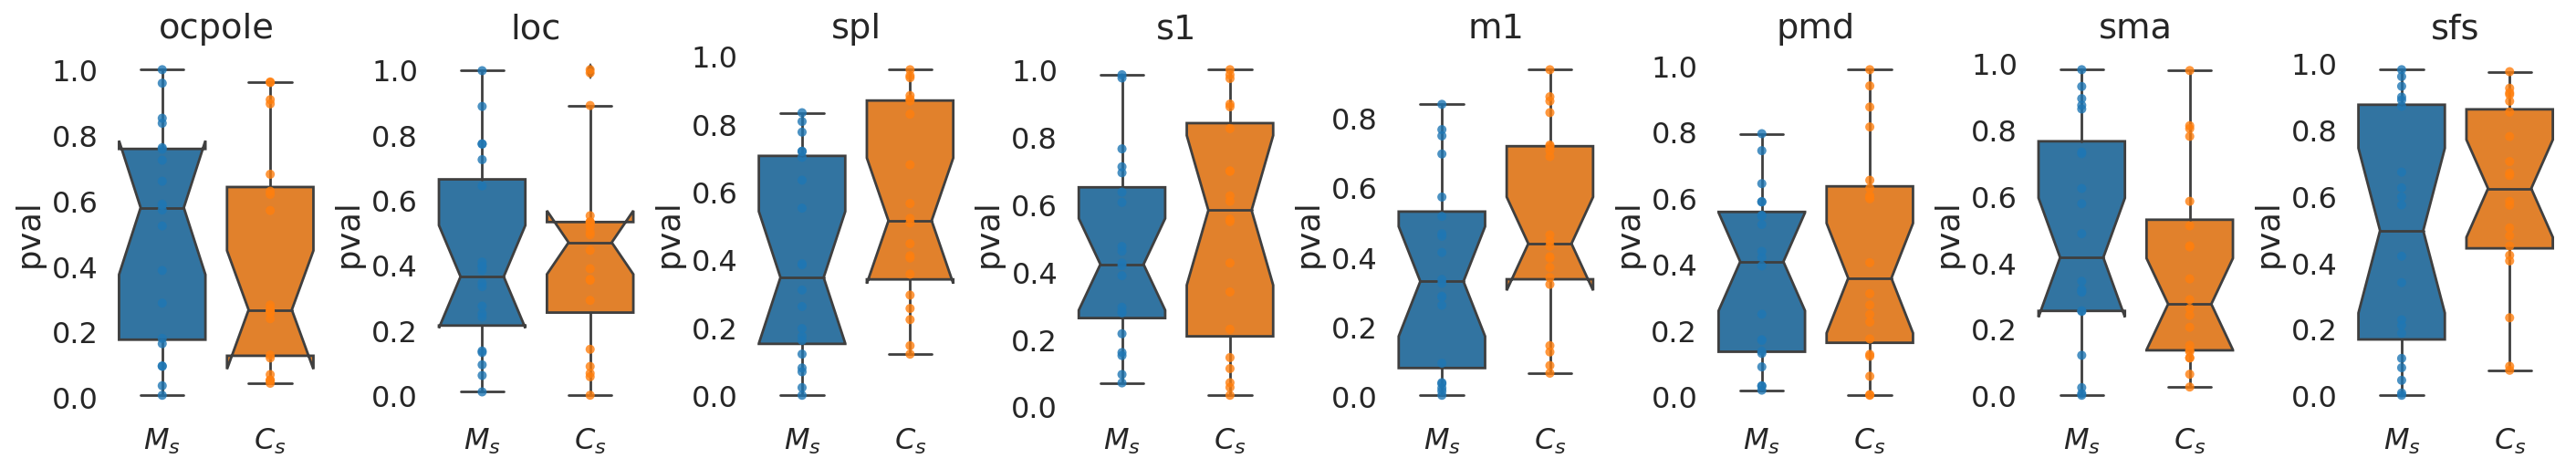

Stopping server
Stopping server


In [492]:
sns.set_context(context='paper', font_scale=2.0)
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20,4))
# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sps']
# flatten axes for easy iterating
roi_num = 0

for roi, ax in zip(rois,(axes.flatten())):
    pvals = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/lh'+roi+'_pvals.csv'), header=None)
    pvals.columns = ['$M_s$','$C_s$']
    pvals['subject'] = pvals.index
    tidy = (
        pvals.set_index('subject')
          .stack()  # un-pivots the data 
          .reset_index()  # moves all data out of the index
          .rename(columns={'level_1': 'type', 0: 'distance'})
    )
    
    sns.boxplot(y='distance', x='type', data=tidy, ax=ax, notch=True)
    sns.stripplot(y='distance', x='type', data=tidy, split=True, alpha=.8, ax=ax)
    ax.set_title(roi)
    ax.set_xlabel('')
    ax.set_ylabel('pval')
    if rois[roi_num-1]=='sps' :
        plt.title('sfs')
  
    group = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/group_id.csv'),header=None)
    pvals['group'] = group[0]
    print roi
    sequence = pvals[pvals['group']==1]
    print sequence[sequence<0.05].count()/10
    control = pvals[pvals['group']==0]
    print control[control<0.05].count()/10
plt.tight_layout(w_pad=0.2) 
plt.savefig('/home/beukema2/Dropbox/modmap/figures/pvals.png')

In [434]:
group = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/group_id.csv'),header=None)
pvals['group'] = group[0]

In [486]:
control = pvals[pvals['group']==0]
print control[control<0.05].count()/20


$M_s$      0.00
$C_s$      0.00
subject    0.05
group      0.50
dtype: float64


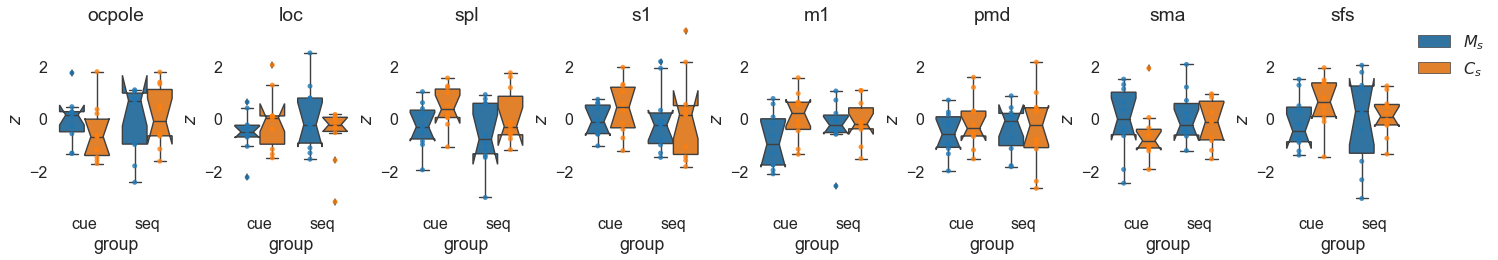

In [36]:
sns.set_context(context='paper', font_scale=2.0)
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20,4))
# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)
rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sps']
# flatten axes for easy iterating
roi_num = 0

for roi, ax in zip(rois,(axes.flatten())):
    zvals = pd.DataFrame(columns = ['$M_s$','$C_s$'])
    zvalsmvt= pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/pdists/lh'+roi+'_z_mvt.csv'), header=None)
    zvalscue = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/pdists/lh'+roi+'_z_cue.csv'), header=None)
    zvals['$M_s$'] = zvalsmvt.values[0]
    zvals['$C_s$'] = zvalscue.values[0]
    group = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/group_id.csv'),header=None)
    zvals['subject'] = zvals.index
    tidy = (
            zvals.set_index('subject')
              .stack()  # un-pivots the data 
              .reset_index()  # moves all data out of the index
              .rename(columns={'level_1': 'type', 0: 'distance'})
            )
    group = pd.read_csv(os.path.expanduser('~/Dropbox/modmap/figures/group_id.csv'),header=None)
    tidy['group'] = np.repeat(group[0].values,2)
    sns.boxplot(y='distance', x='group', hue='type', data=tidy, ax=ax, notch=True)
    sns.stripplot(y='distance', x='group', hue='type', data=tidy, split=True, alpha=.8, ax=ax)
    ax.set_title(roi)
    plt.legend()
    ax.set_xlabel('group')
    ax.set_xticklabels(['cue','seq'])
    ax.set_ylim([-3.5,3.5])
    ax.set_ylabel('$z$')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()
    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if rois[roi_num-1]=='sps' :
        l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        plt.title('sfs')
  

#     sequence = pvals[pvals['group']==1]
#     print sequence[sequence<0.05].count()/10
#     control = pvals[pvals['group']==0]
#     print control[control<0.05].count()/10
plt.tight_layout(w_pad=0.2) 
plt.savefig(os.path.expanduser('~/Dropbox/modmap/figures/zvals.png'))

In [57]:
    sns.boxplot(y='distance', x='type', hue=group, data=tidy, ax=ax, notch=True)
    sns.stripplot(y='distance', x='type', hue=group, data=tidy, split=True, alpha=.8, ax=ax)
    ax.set_title(roi)
    ax.set_xlabel('')
    ax.set_ylabel('pval')
    if rois[roi_num-1]=='sps' :
        plt.title('sfs')
  
#     print roi
#     sequence = pvals[pvals['group']==1]
#     print sequence[sequence<0.05].count()/10
#     control = pvals[pvals['group']==0]
#     print control[control<0.05].count()/10
plt.tight_layout(w_pad=0.2) 
plt.savefig('/home/beukema2/Dropbox/modmap/figures/zvals.png')

TypeError: 'numpy.int64' object is not iterable

In [25]:
zvals = pd.DataFrame(columns = ['$M_s$','$C_s$'])
zvalsmvt= pd.read_csv('/home/beukema2/Dropbox/modmap/figures/pdists/lhocpole_z_mvt.csv', header=None)
zvalscue = pd.read_csv('/home/beukema2/Dropbox/modmap/figures/pdists/lhocpole_z_cue.csv', header=None)
zvals['$M_s$'] = zvalsmvt.values[0]
zvals['$C_s$'] = zvalscue.values[0]
group = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/group_id.csv'),header=None)
#zvals['group'] = group[0]
zvals['subject'] = zvals.index
tidy = (
        zvals.set_index('subject')
          .stack()  # un-pivots the data 
          .reset_index()  # moves all data out of the index
          .rename(columns={'level_1': 'type', 0: 'distance'})
        )

## Percent encoding


In [51]:
distances

,percentEncoding,roi,mvtvscue,group
0,0.0143,1,1,0
2,-0.1319,1,1,1
4,0.0438,1,1,1
6,-0.0472,1,1,0
8,-0.4870,1,1,1
10,-0.0741,1,1,1
12,-0.2089,1,1,0
14,-0.1436,1,1,1
16,-0.2111,1,1,0
18,0.0591,1,1,0


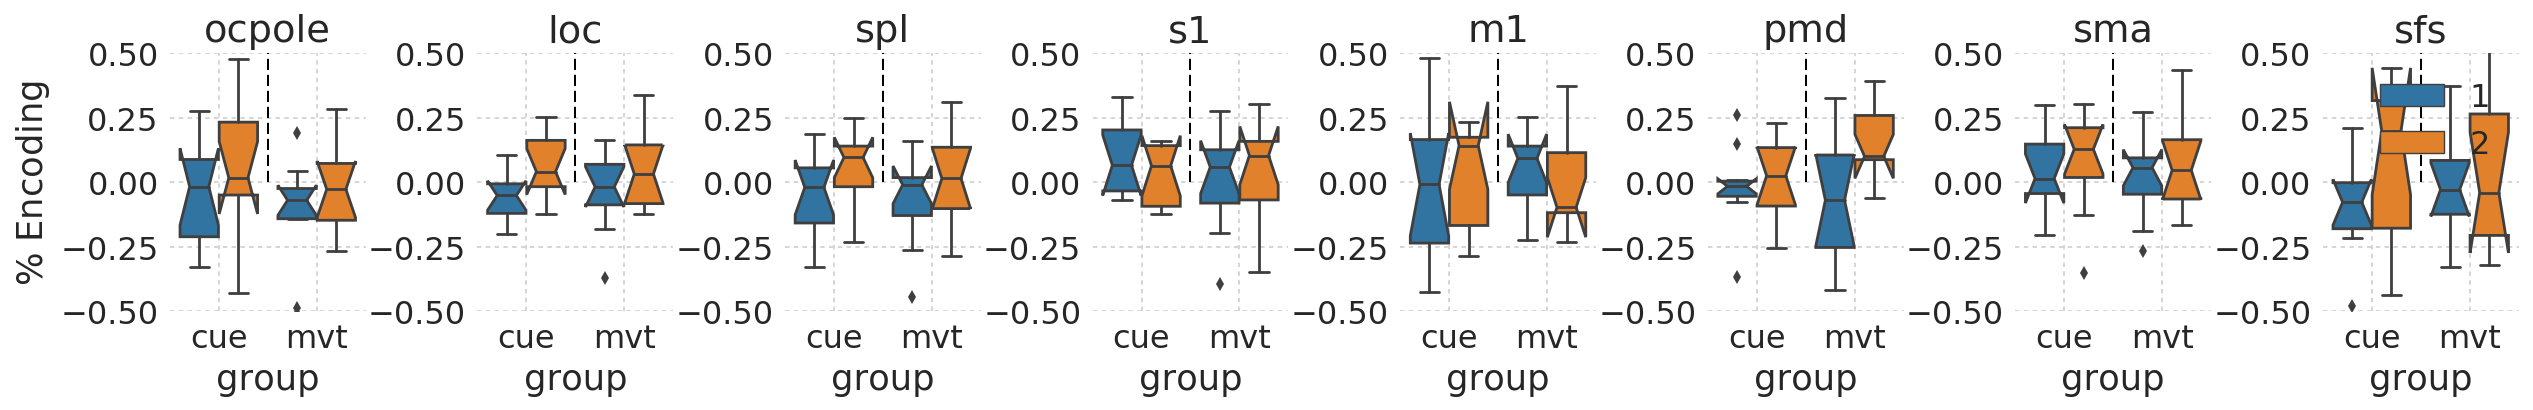

In [60]:
fig = plt.figure(figsize=(20,8))
distances = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/expansion_test.csv'), header=None)
distances.columns = ['percentEncoding','roi', 'mvtvscue','group']

rois = ['ocpole', 'loc', 'spl', 's1', 'm1', 'pmd', 'sma', 'sfs']

current_plot_number = 391
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.boxplot(y='percentEncoding', x='group',hue='mvtvscue', data=this_roi, notch=True)
#sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)
g.set_xticklabels(['CueGroup','MvtGroup'])
plt.grid(linestyle='dotted')
plt.plot([.5, .5],[0, 1], 'k--', linewidth=1)
ax = plt.gca()
ax.set_ylim([-.5, .5])
ax.set_ylabel(r'$\%$ Encoding')
ax.set_xlabel('group')
ax.set_xticklabels(['cue','mvt'])
ax.legend_.remove()
plt.title(rois[0])
for i in arange(2,9):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.boxplot(y='percentEncoding', x='group',hue='mvtvscue', data=this_roi, notch=True)
    #sns.stripplot(y='normdistance', x='group',hue='set_vs_first',data=this_roi, split=True, alpha=.6)
    ax = plt.gca()
    plt.grid(linestyle='dotted')
    ax.set_xlabel('')
    ax.set_ylim([-.5, .5])
    ax.set_ylabel('')
    ax.set_xlabel('group')
    ax.set_xticklabels(['cue','mvt'])
    ax.legend_.remove()
    #ax.set_yticklabels([])
    plt.plot([.5, .5],[0,1], 'k--', linewidth=1)
    plt.title(rois[roi_num-1])
plt.legend()
plt.tight_layout(w_pad=0.6)
plt.savefig(os.path.expanduser('~/Dropbox/modmap/figures/expansion_cue.svg'), format='svg', dpi=1000)

### Frequentist and Bayesian ANOVA data prepration

In [47]:
pre= distances.iloc[:, [i for i in range(len(distances.percentEncoding)) if i%2 == 1]]
post = distances.iloc[:, [i for i in range(len(distances.percentEncoding)) if i%2 == 0]]

# subtract the values of the data frames and store the results in a new data frame


IndexError: positional indexers are out-of-bounds

In [17]:
outtable['mvtsetpre_seqgroup'] = table[(table['sma'] == roi) & (table['group'] == 1) & (table['pre_vs_post'] == 1)].percentEncoding.values


KeyError: 'sma'

In [20]:
table = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/expansion_test.csv'), header=None)

table.columns = ['percentEncoding','pre_vs_post','roi', 'mvtvscue','group']
table = table.loc[table['mvtvscue'] == 2]
for roi in xrange(1,9):
    outtable = pd.DataFrame()
    outtable['mvtsetpre_seqgroup'] = table[(table['roi'] == roi) & (table['group'] == 1) & (table['pre_vs_post'] == 1)].percentEncoding.values
    outtable['mvtsetpost_seqgroup'] = table[(table['roi'] == roi) & (table['group'] == 1) & (table['pre_vs_post'] == 2)].percentEncoding.values
    outtable['mvtsetpre_cuegroup'] = table[(table['roi'] == roi) & (table['group'] == 0) & (table['pre_vs_post'] == 1)].percentEncoding.values
    outtable['mvtsetpost_cuegroup'] = table[(table['roi'] == roi) & (table['group'] == 0) & (table['pre_vs_post'] == 2)].percentEncoding.values
    outtable.to_csv(os.path.expanduser('/home/beukema2/Dropbox/modmap/figures/final_figures/figure3/stat_testing/mm_%s_expansion_seq.csv'% roi), index=False)